In [115]:
import numpy as np   # or pip install pyforest
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [116]:
datasets = pd.read_csv("kc_house_data.csv")
datasets.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [117]:
datasets.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [118]:
#bedroom max is 33...(outlier)
#sqft_living  

In [119]:
datasets.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [120]:
datasets.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Text(0, 0.5, 'count')

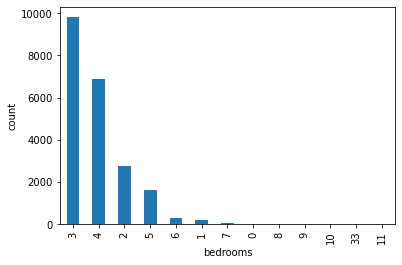

In [121]:
datasets['bedrooms'].value_counts().plot(kind='bar')
plt.xlabel('bedrooms')
plt.ylabel('count')

<Figure size 720x720 with 0 Axes>

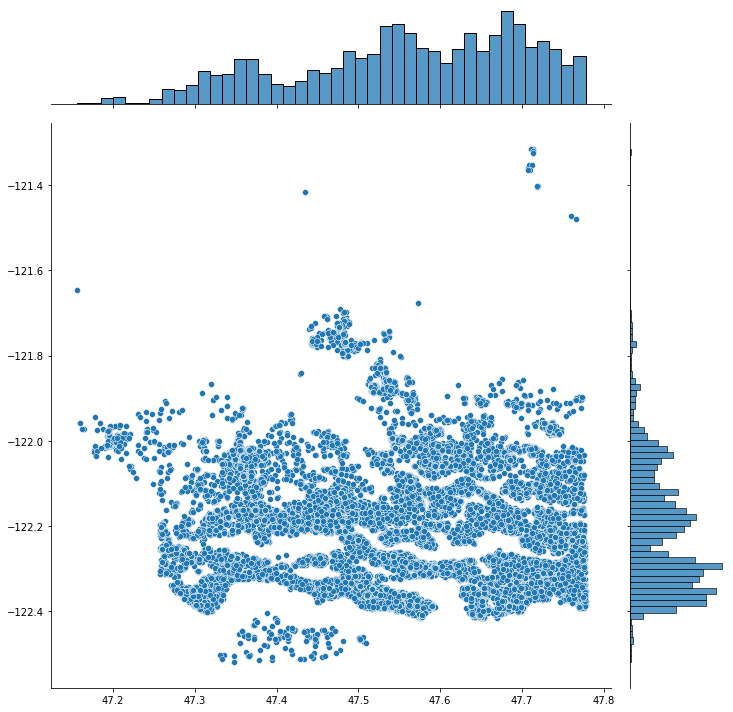

In [122]:
# 3 &4 bedrooms houses are more selling and now we want to which area 
import seaborn as sns  
plt.figure(figsize=(10,10))
sns.jointplot(x=datasets.lat.values, y=datasets.long.values,height=10)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

Text(0.5, 1.0, 'Price vs sqft')

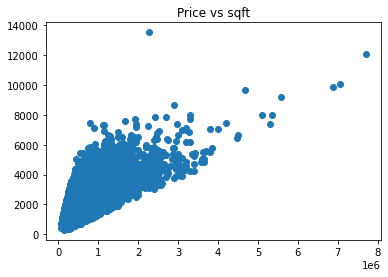

In [123]:
plt.scatter(datasets.price,datasets.sqft_living)
plt.title("Price vs sqft")

Text(0.5, 1.0, 'Price vs location')

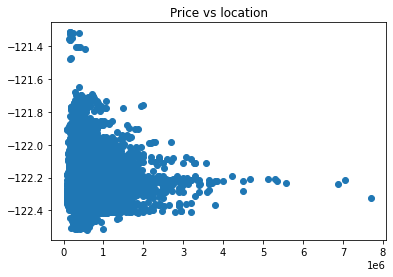

In [124]:
plt.scatter(datasets.price,datasets.long)
plt.title("Price vs location")

Text(0.5, 1.0, 'Price vs bedrooms')

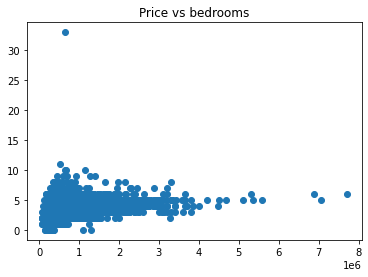

In [125]:
plt.scatter(datasets.price,datasets.bedrooms)
plt.title("Price vs bedrooms")

Text(0.5, 1.0, 'Price vs basement')

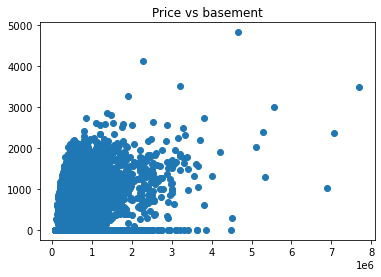

In [126]:
plt.scatter(datasets.price,datasets.sqft_basement)
plt.title("Price vs basement")

Text(0.5, 1.0, 'Price vs waterfront')

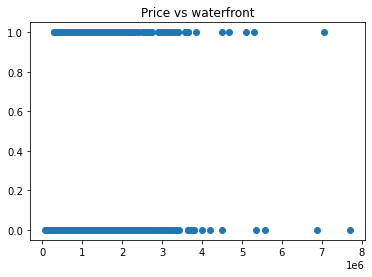

In [127]:
plt.scatter(datasets.price,datasets.waterfront)
plt.title("Price vs waterfront")

Text(0.5, 1.0, 'Price vs condition')

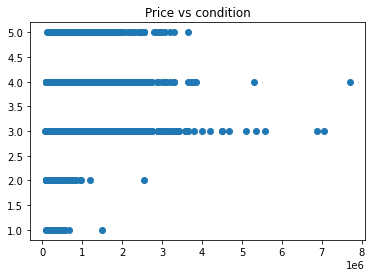

In [128]:
plt.scatter(datasets.price,datasets.condition)
plt.title("Price vs condition")

Text(0.5, 1.0, 'Price vs zipcode')

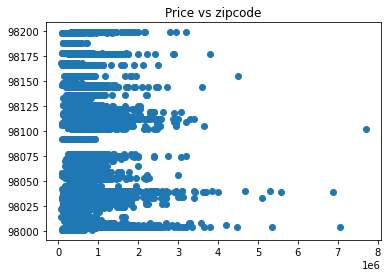

In [129]:
plt.scatter(datasets.price,datasets.zipcode)
plt.title("Price vs zipcode")

In [130]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
labels = datasets['price']
train1 = datasets.drop(['id','price','date'],axis=1)

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(train1,labels,test_size=0.10,random_state=2)
reg.fit(X_train,y_train)

LinearRegression()

In [132]:
reg.score(X_test,y_test)

0.7320342760357519

In [133]:
p=reg.predict(X_test)
p

array([ 708968.57473739, 1454115.56763591,  422619.2777828 , ...,
        191420.54893193,  238056.68598486,  451235.02573466])

In [137]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,p)
print("r2 socre is: {}".format(score))
print("mean_sqrd_error is : {}".format(mean_squared_error(y_test,p)))
print("root_mean_squared error of is: {}".format(np.sqrt(mean_squared_error(y_test,p))))

r2 socre is: 0.7320342760357519
mean_sqrd_error is : 39156588377.34998
root_mean_squared error of is: 197880.2374603133


In [95]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
ridge.score(X_train,y_train)

0.6957001872539408

In [96]:
ridge.score(X_test,y_test)

0.7321366528769664

In [100]:
#lets increase alpha   (bydeault it is 1)
ridge10 = Ridge(alpha=5).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test,y_test)))

Training set score: 0.70
Test set score: 0.73


In [102]:
ridge01 = Ridge(alpha=0.05).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test,y_test)))

Training set score: 0.70
Test set score: 0.73


In [103]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,y_test)))
print("Number of feature used: {:.2f}".format(np.sum(lasso.coef_ !=0)))

Training set score: 0.70
Test set score: 0.73
Number of feature used: 18.00


C:\Users\VISH\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359827173528005.1, tolerance: 259663067593.3918
  model = cd_fast.enet_coordinate_descent(


In [105]:
lasso01 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso01.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso01.score(X_test,y_test)))
print("Number of feature used: {:.2f}".format(np.sum(lasso01.coef_ !=0)))

Training set score: 0.70
Test set score: 0.73
Number of feature used: 18.00


C:\Users\VISH\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359796351694682.94, tolerance: 259663067593.3918
  model = cd_fast.enet_coordinate_descent(
